# Notebook 3A: Linear Regression, Ridge Regression, Lasso Regression

Organized and prepared by Christopher Monterola, updated by Kenneth Co.

This notebook was conceptualized, organized, and primarily prepared for the **Machine Learning** course.

### This notebook uses the following references:
- Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017
- https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

# General Idea
Linear models are a class of models that are widely used in practice, and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models are models that make a prediction using a linear function of the input features, for regression, the general prediction formula for a linear model looks as follows:

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b
\end{align*}

Here, $x[0]$ to $x[p]$ denotes the features of a single data point with $p$ features, $w$ and $b$ are parameters of the model that are learned, and $\hat{y}$ is the prediction the model makes.

For a dataset with a single feature, this is which you might remember as the equation for a line. In that case, $w[0]$ is the slope, and $b$ is the y-axis offset or the y -intercept. For more features, w contains the slopes along each feature axis. Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of w.

In this notebook we will implement linear regression as well as regularization methods, L1 and L2, that improves the generalization capability of usual linear regression methods.

The notebook is divided into the following sections:
1.  Linear Regression framework and two examples
2.  Feature Engineering technique: Adding derived features
3.  Ridge Regression (L2 Regularization)
4.  Lasso Regression (L1 Regularization)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import warnings
def showwarning(*args, **kwargs):
    if args[1] is DeprecationWarning:
        return
    warnings._showwarning_orig(*args, **kwargs)
warnings.showwarning = showwarning

In [2]:
pip install --upgrade joblib==1.1.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install mglearn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2g}'.format

#1.  Linear Regression using Ordinary Least Squares (OLS)

Linear regression or *Ordinary Least Squares (OLS)* is the simplest and most classic
linear method for regression. Linear regression finds the parameters $w$ and $b$ that minimize the mean squared error between predictions $\hat{y}$ and the true regression targets $y_i$ on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values.

We can determine the fitting parameters  $w[i]$ and $b$ using various methods such as Gradient-descent method, Newton-Raphson,  Levenberg–Marquardt algorithm (LMA, https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm), or various linear algebra methods that essentially attemps to minimize the error/cost $\mathbf{E}$ function given by:

\begin{equation}
\mathbf{E}=\frac{(y_{i}-\hat{y})^2}{2}
\end{equation}

where again $\hat{y}$ is the fitted function (the prediction the model makes) and $y_{i}$ is the actual data. We will not describe in this course how the above algoritms work.


## Example 1. Wave Dataset

We go back to this example used in the first lecture and implement linear regression. The goal is to determine the slope $w[0]$ and y-intercept $b$ on the one-dimensional wave dataset.

w[0]: 0.393906  b: -0.031804


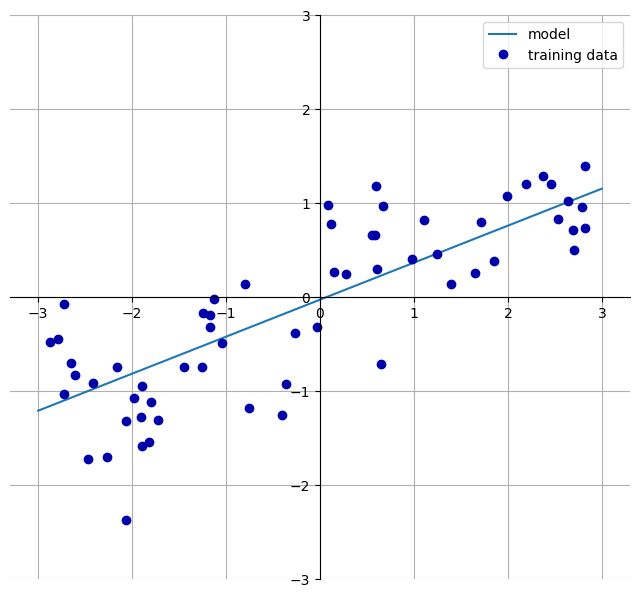

In [5]:
mglearn.plots.plot_linear_regression_wave()

**We added a coordinate cross into the plot to make it easier to understand the line.**

Looking at w[0] we see that the slope should be roughly around 0.4, which we can confirm visually in the plot above. The intercept is where the prediction line should cross the y-axis, which is slightly below 0, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is when having more features).

If you compare the predictions with those made by the **KNeighborsRegressor**, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost.

In a sense this is true.



It is a strong (and somewhat unrealistic) assumption that our target $y$ is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target $y$ can be perfectly modeled (on the training set) as a linear function (This is easy to see if you know some linear algebra!).

There are many different linear models for regression. The difference between these models is how the model parameters $w$ and $b$ are learned from the training data, and how model complexity can be controlled. We will now go through the most popular linear models for regression.

Now, let's formulate this problem consistent with how we implement the kNN algorithm.

In [6]:
from sklearn.linear_model import LinearRegression #Import the library of ML model
X, y = mglearn.datasets.make_wave(n_samples=60) #Define the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Separate training and test set
lr = LinearRegression().fit(X_train, y_train) #Fit the training data for the chosen ML model

0.65933685968637


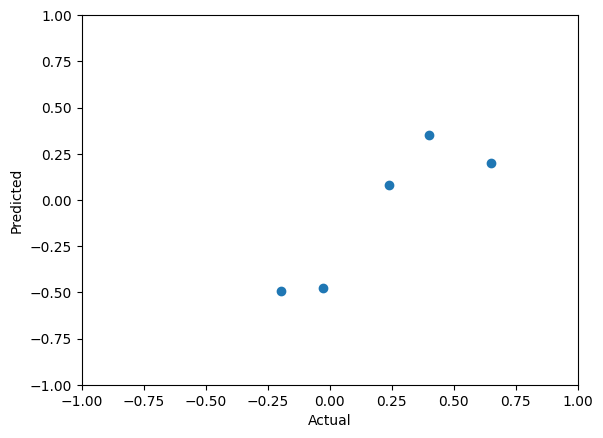

In [7]:
from sklearn.metrics import r2_score

plt.plot( y_test, lr.predict(X_test), 'o')
plt.xlim(-1,1)
plt.ylim(-1, 1)
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(r2_score(y_test, lr.predict(X_test)))

The “slope” parameters $w$, also called weights or coefficients are stored in the *coef_
attribute*, while the offset or intercept $b$ is stored in the *intercept_ attribute*.

*[You might notice the strange-looking trailing underscore. Scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.]*

In [8]:
print("lr.coef_: %s" % lr.coef_)
print("lr.intercept_: %s" % lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The intercept_ attribute is always a single float number, while the coef_ attribute is
a numpy array with one entry per input feature. As we only have a single input feature
in the wave dataset, lr.coef_ only has a single entry.

Let’s look at the training set and test set performance:

In [9]:
print("Training set score R^2: %f" % lr.score(X_train, y_train))
print("Test set score R^2: %f" % lr.score(X_test, y_test))

Training set score R^2: 0.670089
Test set score R^2: 0.659337


Let's get a statistics and get average the testing and training accuracy of 100 data trials.

In [10]:
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lr = LinearRegression().fit(X_train, y_train)

    training_accuracy.append(lr.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(lr.score(X_test, y_test))   # record generalization accuracy

print("TRAIN SET: Mean R^2 = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean R^2 = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean R^2 =  0.670815229039529  Stdev =  0.03111376753811104
 TEST SET: Mean R^2 =  0.6206278655750175  Stdev =  0.11352456492066987


An $R^2$ of around .62 is not very good (recall that using **kNN** regression we get an $R^2$=0.83 for **n_neighbors**=3), but we can see that the score on training and test set are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher dimensional datasets (meaning a large number of features) there is a higher chance of overfitting.

## Example 2. Boston Housing Dataset
Let's take a look at how **LinearRegression** performs on a more complex dataset, like the Boston Housing dataset.

The task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information about the neighborhoods such as crime rate, proximity to the Charles River, highway accessibility and so on.

This data has been deprecated recently after being used as standard data for over two decades from sk_learn because of ethical concerns concerning potentially discriminating variables. I would like to hear your thoughts on this issue.

The datasets contains 506 data points, described by 13 features:

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

dummy=df

In [ ]:
dummy.shape

(506, 14)

In [ ]:
df_features=dummy.drop('MEDV', axis=1) #Remove the target column X
df_target=dummy['MEDV']
len(df_features)
df_features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18,2.3,0,0.54,6.6,65,4.1,1,3e+02,15,4e+02,5
1,0.027,0,7.1,0,0.47,6.4,79,5,2,2.4e+02,18,4e+02,9.1
2,0.027,0,7.1,0,0.47,7.2,61,5,2,2.4e+02,18,3.9e+02,4
3,0.032,0,2.2,0,0.46,7,46,6.1,3,2.2e+02,19,3.9e+02,2.9
4,0.069,0,2.2,0,0.46,7.1,54,6.1,3,2.2e+02,19,4e+02,5.3


We load the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [ ]:
X, y =df_features, df_target # Load data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state=8) # Define training/test set
lr = LinearRegression().fit(X_train, y_train) #Fit the training data for the chosen ML model

When comparing training set and test set score, we find that we predict more accurately on the training set ($R^2 \sim 0.72$) compare to the test set ($R^2 \sim 0.74$) as to be expected, see below.

In [ ]:
print("Training set score R^2: %f" % lr.score(X_train, y_train))
print("Test set score R^2: %f" % lr.score(X_test, y_test))

Training set score R^2: 0.744482
Test set score R^2: 0.719005


Let's average over 100 trials

In [ ]:
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lr = LinearRegression().fit(X_train, y_train)

    training_accuracy.append(lr.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(lr.score(X_test, y_test))   # record generalization accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.7432542947177332  Stdev =  0.013042887663936643
 TEST SET: Mean =  0.7129855993166654  Stdev =  0.04488577054911468


One advantage of linear regression model is the interpretation is straightforward as the coefficients are directly proportional to their contribution to the target variable prediction.

Weight of the top predictor = 14.338110
Top Predictor = NOX


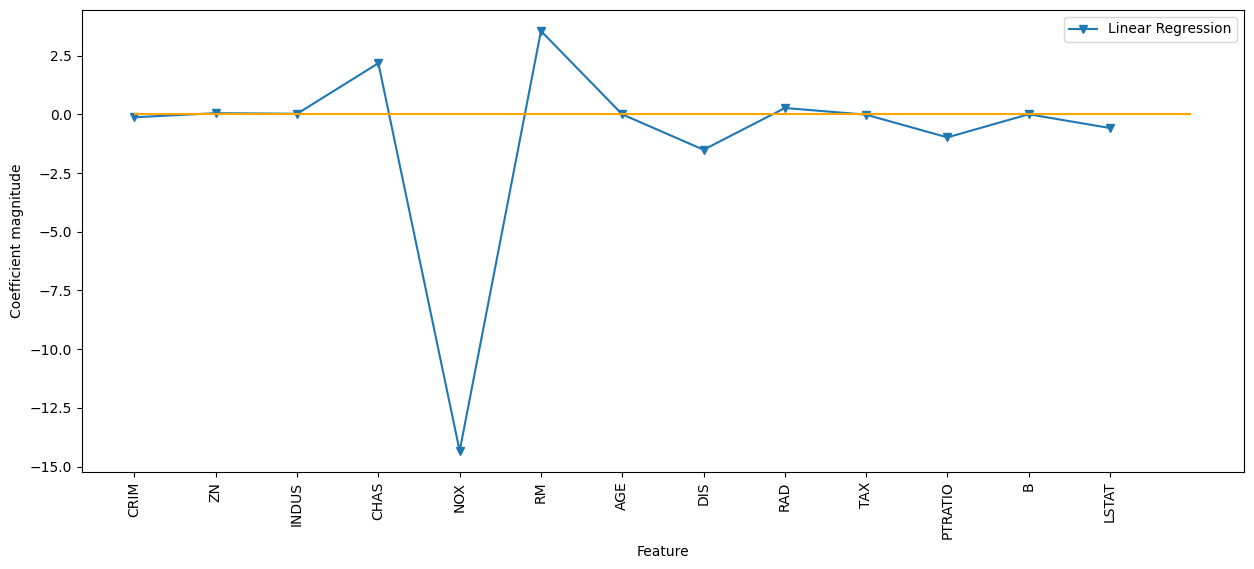

In [ ]:
fig = plt.figure(figsize=(15, 6))
plt.plot(lr.coef_.T, '-v', label="Linear Regression")
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.hlines(0,0, df_features.shape[1],'orange')
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(lr.coef_.T))) #Determine which among the coefficients has the highest value
print("Top Predictor = %s" %df_features.columns[np.argmax(np.abs(lr.coef_.T))])

Let us put this in bargraph normalize with the top predictor.

(-1.0, 13.0)

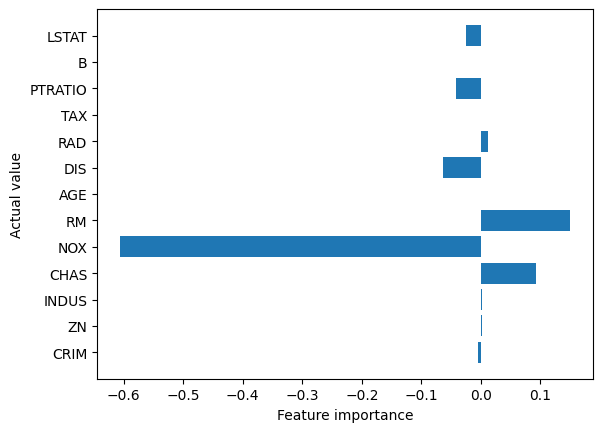

In [ ]:
weights_normalized= lr.coef_.T/np.sum(np.abs(lr.coef_.T))

import numpy as np

n_features=13
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features),df_features.columns)
plt.xlabel("Feature importance")
plt.ylabel("Actual value")
plt.ylim(-1,n_features)

Variables with positive coefficients
- `RM`: average number of rooms per dwelling.
- `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`: proportion of non-retail business acres per town.

Variables with negative coefficients
- `NOX`: nitrogen oxides concentration (parts per 10 million).
- `DIS`: weighted mean of distances to five Boston employment centres.
- `PTRATIO`: pupil-teacher ratio by town.
- `LSTAT`: % of pop with low socioeconomic status.
- `CRIM`: per capita crime rate by town.

# 1. Feature Engineering: Adding derived features

One can actually expand this dataset by not only considering
these 13 measurements as input features, but also looking at all products (also called interactions) between features.

In other words, we will not only consider crime rate and highway accessibility as a feature but also the product of crime rate and highway accessibility. Including derived features like these is part of the so-called feature engineering.

Previously, this derived dataset could be loaded using the load_extended_boston function in sklearn, but this had been deprecated due to ethical concerns.

We duplicate the code below:

In [ ]:
# Create new columns by multiplying each column with every other column

for i in range(len(df_features.columns)):
    for j in range(i, len(df_features.columns)):
        col1 = df_features.columns[i]
        col2 = df_features.columns[j]
        new_col_name = f"{col1}_{col2}"
        df[new_col_name] = df_features[col1] * df_features[col2]

# Display the updated DataFrame
#print(df_extended)

df_features=df.drop('MEDV', axis=1) #Remove the target column X
df_target=df['MEDV']
len(df_features)
df_features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX_TAX,TAX_PTRATIO,TAX_B,TAX_LSTAT,PTRATIO_PTRATIO,PTRATIO_B,PTRATIO_LSTAT,B_B,B_LSTAT,LSTAT_LSTAT
0,0.0063,18,2.3,0,0.54,6.6,65,4.1,1,3e+02,...,8.8e+04,4.5e+03,1.2e+05,1.5e+03,2.3e+02,6.1e+03,76,1.6e+05,2e+03,25
1,0.027,0,7.1,0,0.47,6.4,79,5,2,2.4e+02,...,5.9e+04,4.3e+03,9.6e+04,2.2e+03,3.2e+02,7.1e+03,1.6e+02,1.6e+05,3.6e+03,84
2,0.027,0,7.1,0,0.47,7.2,61,5,2,2.4e+02,...,5.9e+04,4.3e+03,9.5e+04,9.8e+02,3.2e+02,7e+03,72,1.5e+05,1.6e+03,16
3,0.032,0,2.2,0,0.46,7,46,6.1,3,2.2e+02,...,4.9e+04,4.2e+03,8.8e+04,6.5e+02,3.5e+02,7.4e+03,55,1.6e+05,1.2e+03,8.6
4,0.069,0,2.2,0,0.46,7.1,54,6.1,3,2.2e+02,...,4.9e+04,4.2e+03,8.8e+04,1.2e+03,3.5e+02,7.4e+03,1e+02,1.6e+05,2.1e+03,28


In [ ]:
df_features.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'CRIM_CRIM',
 'CRIM_ZN',
 'CRIM_INDUS',
 'CRIM_CHAS',
 'CRIM_NOX',
 'CRIM_RM',
 'CRIM_AGE',
 'CRIM_DIS',
 'CRIM_RAD',
 'CRIM_TAX',
 'CRIM_PTRATIO',
 'CRIM_B',
 'CRIM_LSTAT',
 'ZN_ZN',
 'ZN_INDUS',
 'ZN_CHAS',
 'ZN_NOX',
 'ZN_RM',
 'ZN_AGE',
 'ZN_DIS',
 'ZN_RAD',
 'ZN_TAX',
 'ZN_PTRATIO',
 'ZN_B',
 'ZN_LSTAT',
 'INDUS_INDUS',
 'INDUS_CHAS',
 'INDUS_NOX',
 'INDUS_RM',
 'INDUS_AGE',
 'INDUS_DIS',
 'INDUS_RAD',
 'INDUS_TAX',
 'INDUS_PTRATIO',
 'INDUS_B',
 'INDUS_LSTAT',
 'CHAS_CHAS',
 'CHAS_NOX',
 'CHAS_RM',
 'CHAS_AGE',
 'CHAS_DIS',
 'CHAS_RAD',
 'CHAS_TAX',
 'CHAS_PTRATIO',
 'CHAS_B',
 'CHAS_LSTAT',
 'NOX_NOX',
 'NOX_RM',
 'NOX_AGE',
 'NOX_DIS',
 'NOX_RAD',
 'NOX_TAX',
 'NOX_PTRATIO',
 'NOX_B',
 'NOX_LSTAT',
 'RM_RM',
 'RM_AGE',
 'RM_DIS',
 'RM_RAD',
 'RM_TAX',
 'RM_PTRATIO',
 'RM_B',
 'RM_LSTAT',
 'AGE_AGE',
 'AGE_DIS',
 'AGE_RAD',
 'AGE_TAX',
 'AGE_PTRATIO',
 'AGE_B',
 'AGE_LS

In [ ]:
X, y = df_features,df_target
print(X.shape)

(506, 104)


The resulting 104 features are the 13 original features, the 13 choose 2 = 91
(Footnote: the number of ways to pick 2 elements out of 13 elements) features that are product of two features, and one constant feature.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.935011
test set score: 0.857962


Again, let's do averaging

In [ ]:
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    lr = LinearRegression().fit(X_train, y_train)

    training_accuracy.append(lr.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(lr.score(X_test, y_test))   # record generalization accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9366812616843683  Stdev =  0.0059690337453853996
 TEST SET: Mean =  0.7893960835661518  Stdev =  0.12018810684834068


By adding derived features we increased the absolute accuracy by 8%! Also, note the large discrepancy between training and test score. This is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is Ridge regression, which we will look into next.

<div class="alert alert-block alert-success">

## Derived Features: <i>What ``Price`` × ``Promotion`` Captures</i>

To further reinforce the idea of Derived or Interaction Features, let us look at a commerce example with `price` and `promotion_intensity`.

When you create an interaction feature by multiplying `price × promotion_intensity`, you're capturing **how the effect of price changes depending on the promotion level**.

**Without interaction (linear only):**
```
Sales = β₀ + β₁(price) + β₂(promotion) + ε
```
This assumes price always has the same effect regardless of promotion level.

**With interaction:**
```
Sales = β₀ + β₁(price) + β₂(promotion) + β₃(price × promotion) + ε
```

Now the effect of price is: **β₁ + β₃(promotion)**
- When promotion = 0: price effect is just β₁
- When promotion = high: price effect is β₁ + β₃(high value)

This interaction term  **β₃(price × promotion)** allows the model to learn scenarios:
- **Low prices + high promotions** = customers think "cheap item, only good if heavily discounted"
- **High prices + high promotions** = customers think "premium product, great deal!"
- **High prices + no promotions** = customers think "overpriced"

The multiplication creates a **new feature** that's large when both values are large, allowing the model to detect non-linear patterns.
</div>

# 2. Ridge Regression (L2 Regularization)

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same as for ordinary least squares. In Ridge regression,the coefficients w are chosen not only so that they predict well on the training data, but there is an additional constraint. We also want the magnitude of coefficients to be as
small as possible; in other words, all entries of $w$ should be close to $0$.

Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by Ridge
regression is known as **L2** regularization.

Mathematically, Ridge penalizes the **L2** norm of the coefficients, or the Euclidean length of $w$.  That is the cost or error function is now given by:

\begin{equation}
\mathbf{E}=\frac{(y_{i}-\hat{y})^2}{2} + \alpha \sum_i w[i]^2
\end{equation}


where $\alpha$ is the L2 regularization parameter that can be interpreted as:

--- when $\alpha = 0$  The objective becomes same as simple linear regression.

--- when $\alpha = \infty$  The coefficients will be zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

---when $0< \alpha <\infty$  The magnitude of $\alpha$ will decide the weightage given to different parts of objective. The coefficients will be somewhere between 0 and ones for simple linear regression. (see: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

Ridge regression is implemented in **linear_model.Ridge**. Let’s see how well it does on the extended Boston dataset.


In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.25)
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.920280
test set score: 0.887802


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
training_accuracy = []
test_accuracy = []

for seedN in range(1,100,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    ridge = Ridge(alpha=.4).fit(X_train, y_train)

    training_accuracy.append(ridge.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(ridge.score(X_test, y_test))   # record generalization accuracy

print("TRAIN SET: Mean = ", np.mean(training_accuracy), " Stdev = ", np.std(training_accuracy))
print(" TEST SET: Mean = ", np.mean(test_accuracy)," Stdev = ", np.std(test_accuracy))

TRAIN SET: Mean =  0.9327096661135426  Stdev =  0.006051936409116746
 TEST SET: Mean =  0.8005362746301905  Stdev =  0.07925553467738902


As you can see, the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit.

*A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.*

The Ridge model makes a trade-off between the simplicity of the model (near zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the *alpha* $\alpha$ parameter. Above, we used the default parameter $\alpha$=1.0. There is no reason why this would give us the best trade-off, though.

In general,
1. Increasing alpha forces coefficients to move more towards zero, which decreases training set performance, but might help in improving generalization.

2. Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression.

In [ ]:
param=.001
ridge001 = Ridge(alpha=param).fit(X_train, y_train)
print("for alpha =", param)
print("training set score: %f" % ridge001.score(X_train, y_train))
print("test set score: %f \n " % ridge001.score(X_test, y_test))

param=.1
ridge1 = Ridge(alpha=param).fit(X_train, y_train)
print("for alpha =", param)
print("training set score: %f" % ridge1.score(X_train, y_train))
print("test set score: %f \n " % ridge1.score(X_test, y_test))

param=.4
ridge4 = Ridge(alpha=param).fit(X_train, y_train)
print("for alpha =", param)
print("training set score: %f" % ridge4.score(X_train, y_train))
print("test set score: %f \n " % ridge4.score(X_test, y_test))

param=1
ridge_default = Ridge(alpha=param).fit(X_train, y_train)
print("for alpha =", param)
print("training set score: %f" % ridge_default.score(X_train, y_train))
print("test set score: %f \n" % ridge_default.score(X_test, y_test))

param=10
ridge10 = Ridge(alpha=param).fit(X_train, y_train)
print("for alpha =", param)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

for alpha = 0.001
training set score: 0.941234
test set score: 0.490634 
 
for alpha = 0.1
training set score: 0.938732
test set score: 0.714798 
 
for alpha = 0.4
training set score: 0.937795
test set score: 0.718369 
 
for alpha = 1
training set score: 0.936800
test set score: 0.730601 

for alpha = 10
training set score: 0.929686
test set score: 0.799390


Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on up to x=100. The y-axis shows the numeric value of the corresponding value of the
coefficient. The main take-away here is that for alpha=10 (as shown by the green
dots), the coefficients are mostly between around -3 and 3. The coefficients for the
ridge model with alpha=1 (as shown by the blue dots), are somewhat larger. The red
dots have larger magnitude still, and many of the teal dots, corresponding to linear
regression without any regularization (which would be alpha=0) are so large they are
even outside of the chart.

Weight of the top predictor = 6.703403
Top Predictor is Column 5


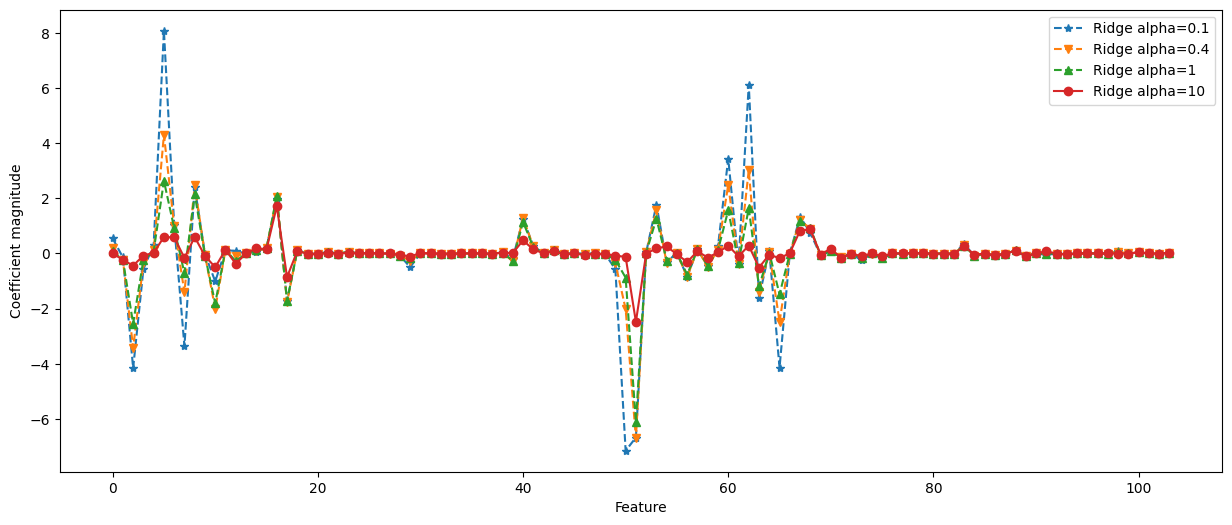

In [ ]:
fig = plt.figure(figsize=(15, 6))

plt.plot(ridge1.coef_.T, '--*', label="Ridge alpha=0.1")
plt.plot(ridge4.coef_.T, '--v', label="Ridge alpha=0.4")
plt.plot(ridge_default.coef_.T, '--^', label="Ridge alpha=1")
plt.plot(ridge10.coef_.T, '-o', label="Ridge alpha=10")
#plt.plot(ridge001.coef_.T, '--*', label="Ridge alpha=0.001")
#plt.plot(lr.coef_.T, 'v', label="LinearRegression")
#plt.xticks(range(boston.data.shape[1]), boston.feature_names, rotation=90)
#plt.hlines(0,0, boston.data.shape[1])
#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

print("Weight of the top predictor = %f" %np.amax(np.abs(ridge4.coef_.T)))
print("Top Predictor is Column %s" %np.abs(np.argmax(ridge4.coef_.T)))

(-1.0, 104.0)

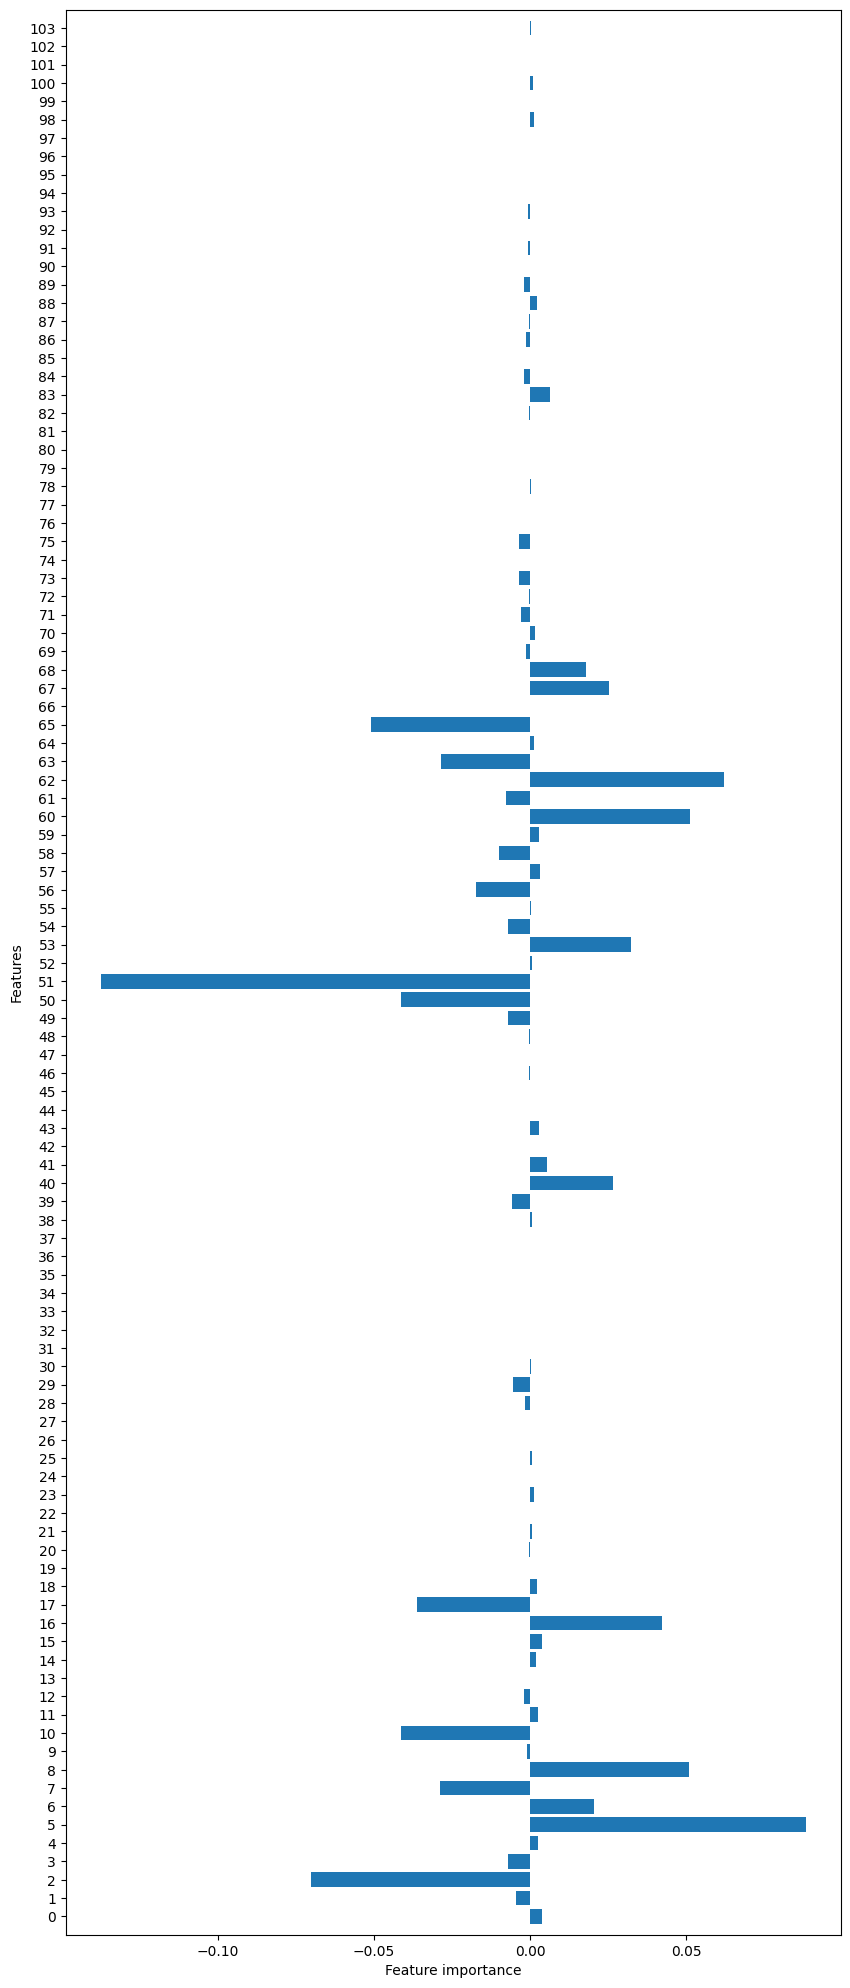

In [ ]:
weights_normalized= ridge4.coef_.T/np.sum(np.abs(ridge4.coef_.T))


import numpy as np

fig = plt.figure(figsize=(10, 25))
n_features=104
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features))
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1,n_features)

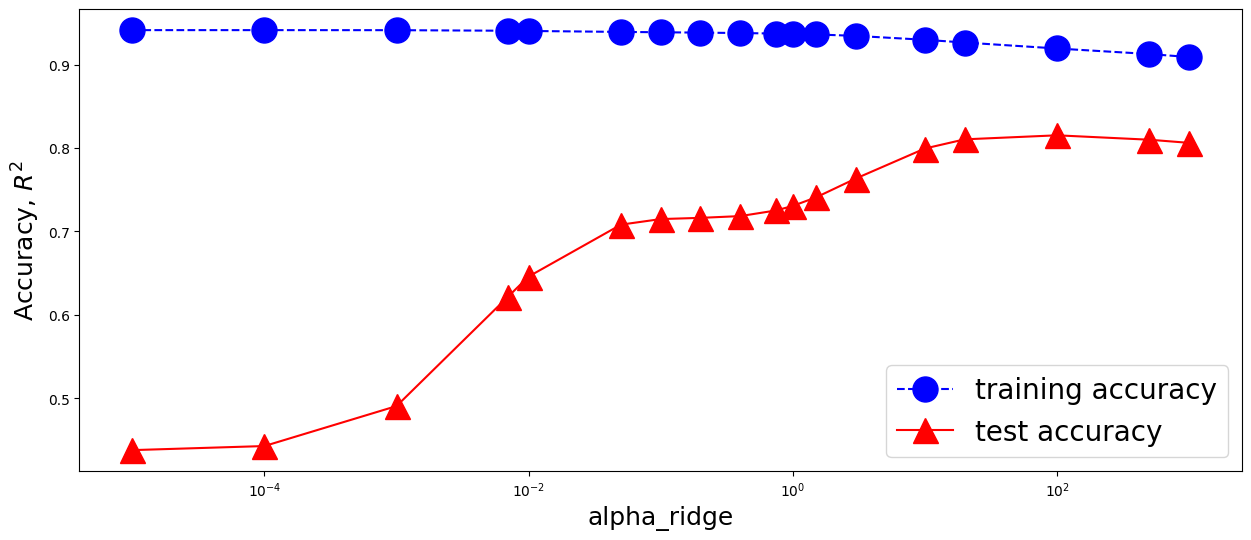

In [ ]:
training_accuracy = []
test_accuracy = []
alpha_ridge = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 
               1.5, 3, 10, 20, 100, 500,1000]

for alpha_run in alpha_ridge:
    ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test, y_test))


fig = plt.figure(figsize=(15, 6))

import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(alpha_ridge, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(alpha_ridge, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("alpha_ridge",fontsize=18)
plt.legend()
pass

Running the Ridge over multiple trials

In [ ]:
No_Trials=20 # Number of Trials

#X, y = mglearn.datasets.load_extended_boston()

all_training = pd.DataFrame()
all_test = pd.DataFrame()


for seedN in range(1,No_Trials,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10, 20, 100, 500, 1000,10000, 100000] #Tuning Parameters

    for alpha_run in alpha_parameter:
        reg = Ridge(alpha=alpha_run) # Define here wether Lasso or Ridge
        reg.fit(X_train, y_train) #build the model
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

Best Accuracy = 0.822253
With lpha given by 1000.000000


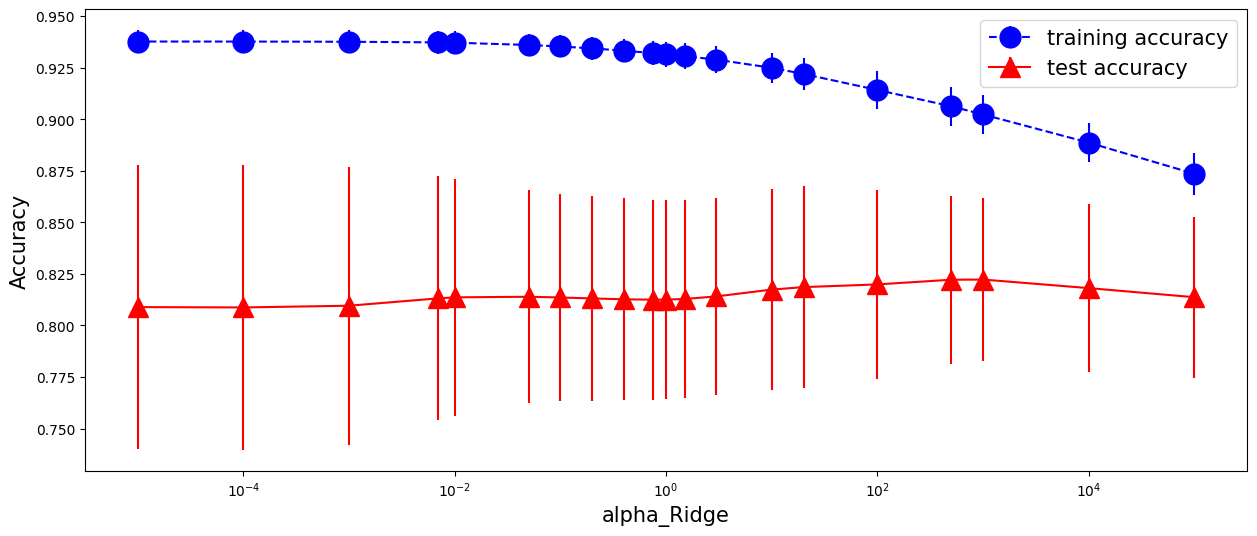

In [ ]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
plt.xscale('log')
#plt.yscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_Ridge",fontsize=15)
plt.legend()

print("Best Accuracy = %f" %np.max(all_test.mean(axis=1)))
print("With \alpha given by %f" %alpha_parameter[np.argmax(all_test.mean(axis=1))])

# 3. Lasso Regression (L1 Regularization)

An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly different way, called **L1 regularization**.

The Lasso penalizes the L1 norm of the coefficient vector, or in other words the sum of the absolute values of the coefficients, mathematically the cost or error function is now given by:

\begin{equation}
\mathbf{E}=\frac{(y_{i}-\hat{y})^2}{2} + \alpha \sum_i \lvert w[i] \rvert
\end{equation}

\begin{equation}
\mathbf{E}=\frac{(y_{i}-\hat{y})^2}{2} + \alpha_1 \sum_i \lvert w[i] \rvert + \alpha_2 \sum_i w[i]^2
\end{equation}

The consequence of L1 regularization is that when using the Lasso, some coefficients
are exactly zero. This means some features are entirely ignored by the model. This can
be seen as a form of automatic feature selection. Having some coefficients be exactly
zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [ ]:
from sklearn.linear_model import Lasso
lasso_default = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso_default.score(X_train, y_train))
print("test set score: %f" % lasso_default.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso_default.coef_ != 0))

training set score: 0.878732
test set score: 0.839135
number of features used: 55


As you can see, the Lasso does quite badly, both on the training and the test set. This indicates that we are underfitting. We find that it only used three of the 104 features. Similarly to Ridge, the Lasso also has a regularization parameter alpha that controls how strongly coefficients are pushed towards zero. Above, we used the default of alpha=1.0. To diminish underfitting, let’s try decreasing alpha.

*Geeky optional note: The algorithm to make the system converge depends on iterations implemented (**max_iter**) and for low value of $\alpha$ we need to increase it manually to assure convergence.*

In [ ]:
#We must increase "max_iter" if not the model would warn us to increase it

lasso2 = Lasso(alpha=5, max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % lasso2.score(X_train, y_train))
print("test set score: %f" % lasso2.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso2.coef_ != 0))

training set score: 0.854121
test set score: 0.827697
number of features used: 35


In [ ]:
lasso007 = Lasso(alpha=0.007, max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % lasso007.score(X_train, y_train))
print("test set score: %f" % lasso007.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso007.coef_ != 0))

training set score: 0.931726
test set score: 0.779753
number of features used: 93


In [ ]:
lasso01 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
print("training set score: %f" % lasso01.score(X_train, y_train))
print("test set score: %f" % lasso01.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso01.coef_ != 0))

training set score: 0.930255
test set score: 0.777676
number of features used: 90


In [ ]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.939659
test set score: 0.811445
number of features used: 101


A lower alpha allowed us to fit a more complex model, which worked better on the
training and the test data. The performance is slightly better than using Ridge, and we
are using only 32 of the 104 features. This makes this model potentially easier to
understand.
If we set alpha too low, we again remove the effect of regularization and end up with a
result similar to LinearRegression.

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.940861
test set score: 0.822928
number of features used: 103


Again, we can plot the coefficients of the different models, similarly to Figure
ridge_coefficients.

For alpha=1, with coefficients shown as blue dots, we not only see that most of the
coefficients are zero (which we already knew), but that the remaining coefficients are
also small in magnitude. Decreasing alpha to 0.01 we obtain the solution shown as
the green dots, which causes most features be exactly zero. Using alpha=0.00001, we
get a model that is quite unregularized, with most coefficients nonzero and of large
magnitude.
For comparison, the best Ridge solution is shown in teal. The ridge model with
alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but
using Ridge, all coefficients are non-zero.

Weight of the top predictor = 3.695208
Top Predictor is Column 5
number of features used: 93


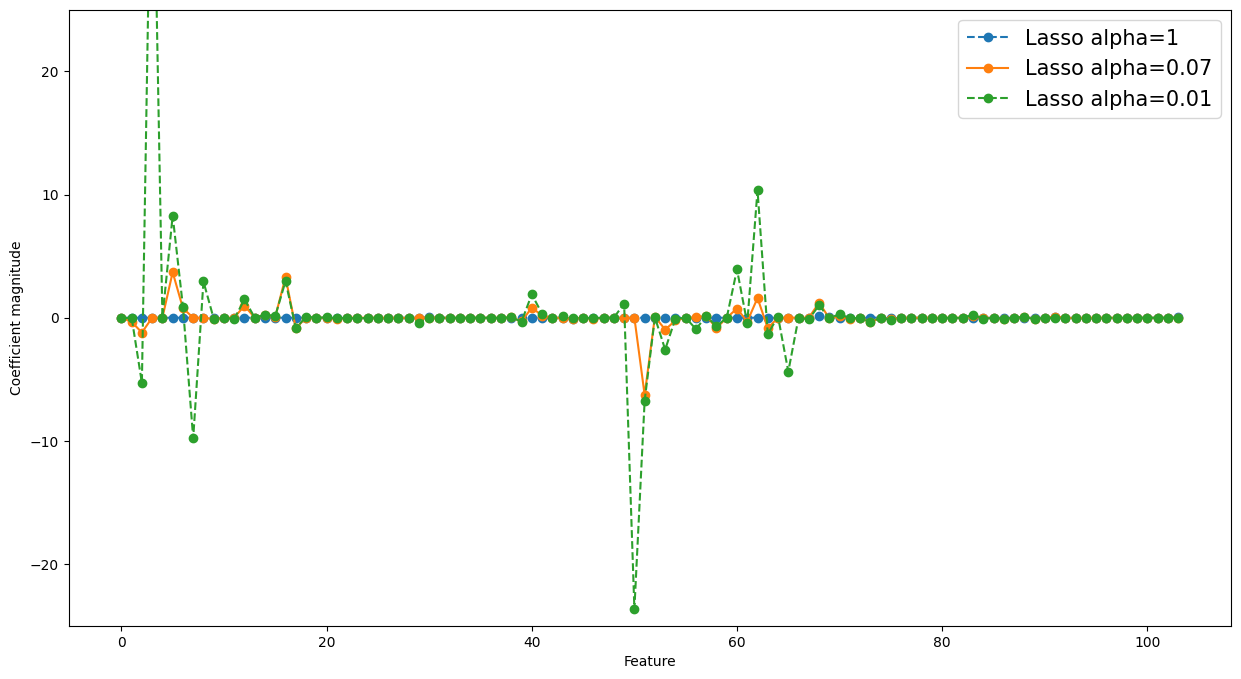

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.plot(lasso_default.coef_, 'o--', label="Lasso alpha=1")
plt.plot(lasso007.coef_, 'o-', label="Lasso alpha=0.07")
plt.plot(lasso001.coef_, 'o--', label="Lasso alpha=0.01")
#plt.plot(ridge1.coef_, 'o-', label="Ridge alpha=0.1")
plt.ylim(-25, 25)

#plt.ylim(-20, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()


print("Weight of the top predictor = %f" %np.abs(np.amax(lasso007.coef_.T)))
print("Top Predictor is Column %s" %np.abs(np.argmax(lasso007.coef_.T)))
#print("Top Predictor = %s" %boston.feature_names[np.argmax(  )
print("number of features used: %d" % np.sum(lasso007.coef_ != 0))



(-1.0, 104.0)

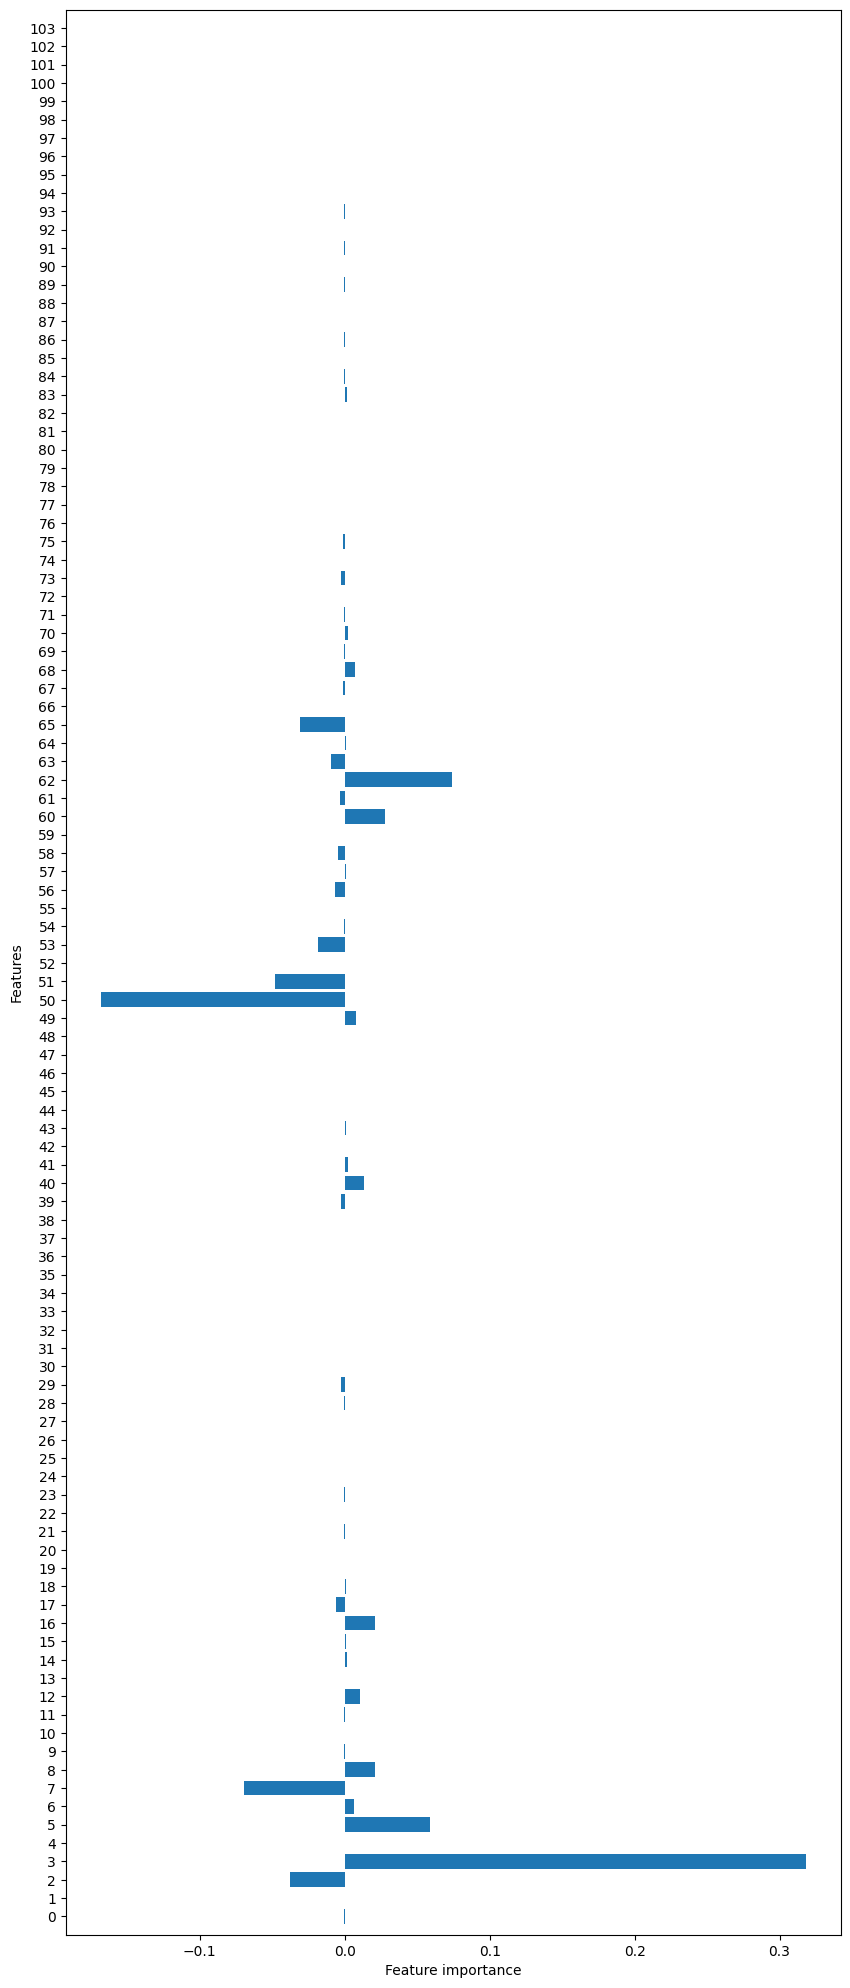

In [ ]:
weights_normalized= lasso001.coef_.T/np.sum(np.abs(lasso001.coef_.T))

import numpy as np

fig = plt.figure(figsize=(10, 25))
n_features=104
plt.barh(range(n_features), weights_normalized, align='center')
plt.yticks(np.arange(n_features))
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1,n_features)

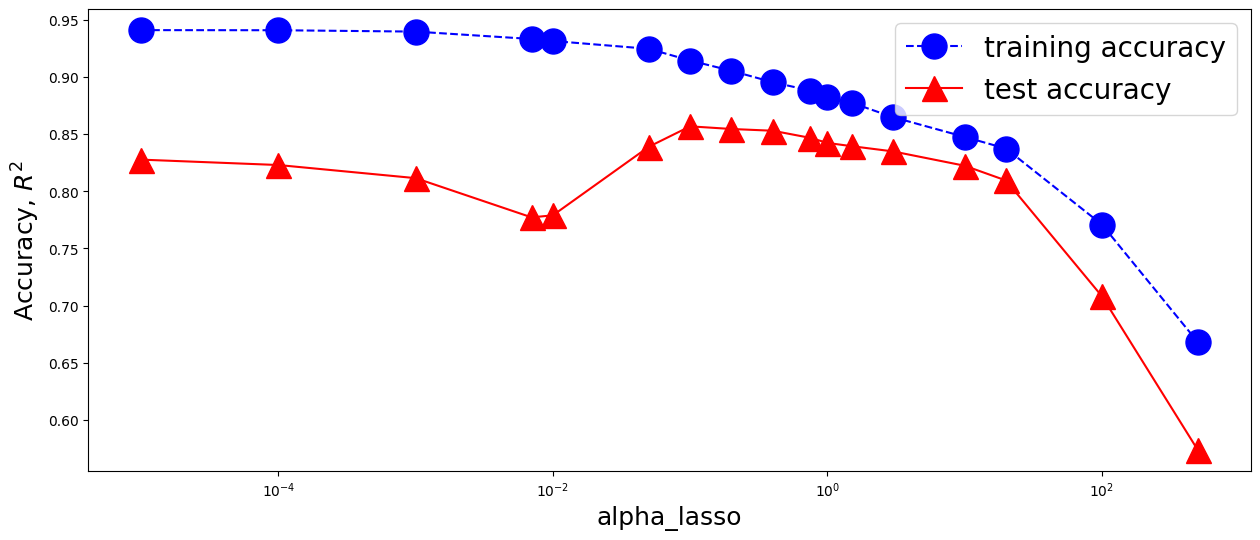

In [ ]:
training_accuracy = []
test_accuracy = []
alpha_lasso = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10, 20, 100, 500]

for alpha_run in alpha_lasso:
    lasso = Lasso(alpha=alpha_run,max_iter=100000).fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test, y_test))
    #print("alpha_run: %f" % alpha_run)
    #print("training set score: %f" % ridge.score(X_train, y_train))
    #print("test set score: %f\n" % ridge.score(X_test, y_test))

fig = plt.figure(figsize=(15, 6))

import pylab as plot
plt.xscale('log')
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(alpha_lasso, training_accuracy, label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(alpha_lasso, test_accuracy, label="test accuracy",color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("alpha_lasso",fontsize=18)
plt.legend()
pass

Running the Lasso over multiple trials

In [ ]:
No_Trials=10 # Number of Trials

#X, y = mglearn.datasets.load_extended_boston()

all_training = pd.DataFrame()
all_test = pd.DataFrame()


for seedN in range(1,No_Trials,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10, 20, 100, 500] #Tuning Parameters

    for alpha_run in alpha_parameter:
        reg = Lasso(alpha=alpha_run, max_iter=100000) # Define here wether Lasso or Ridge
        reg.fit(X_train, y_train) #build the model
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

print("Best Accuracy = %f" %np.max(all_test.mean(axis=1)))
print("With \alpha given by %f" %alpha_parameter[np.argmax(all_test.mean(axis=1))])

Best Accuracy = 0.853374
With lpha given by 0.400000


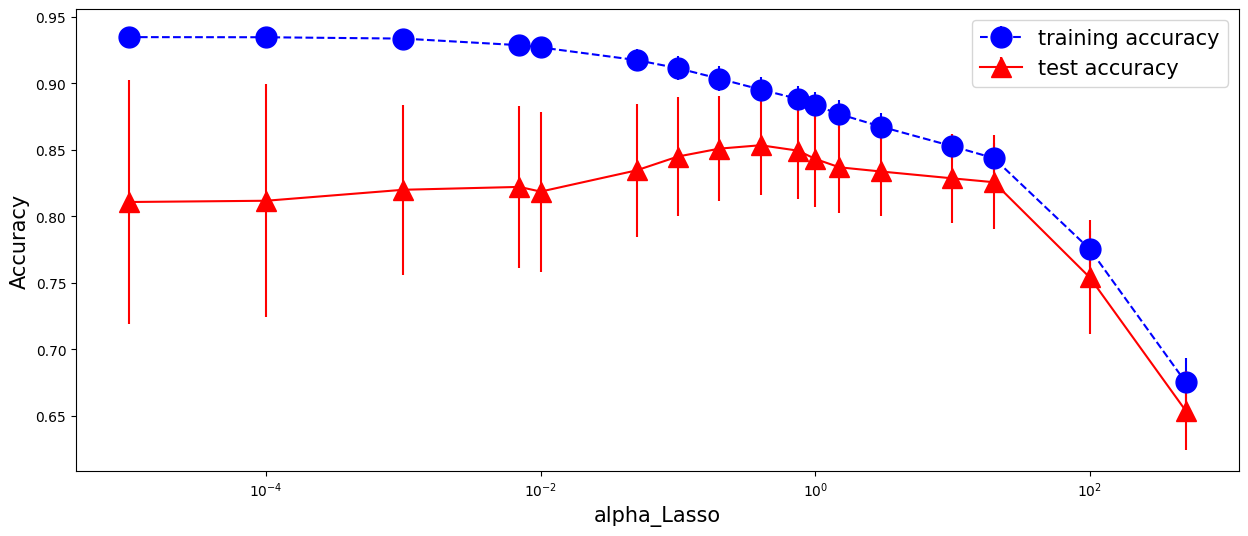

In [ ]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
plt.xscale('log')
#plt.yscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_Lasso",fontsize=15)
plt.legend()